In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [20]:
file_name = 'missions/W2/training.1600000.processed.noemoticon.csv'
column = ('target','id','data','flag','user','text')
df = pd.read_csv(file_name, names=column)
df.head()

,target,id,data,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [21]:
POSITIVE = 4
NEGATIVE = 0

df_pos = df[df['target'] == POSITIVE].copy()
df_neg = df[df['target'] == NEGATIVE].copy()
 
f"The numbers of rows of positive/negative tweets are {df_neg.shape[0]}/{df_pos.shape[0]}"

'The numbers of rows of positive/negative tweets are 800000/800000'

# Cleaning Texts

In [22]:
# @ 언급 제거
def clean_text(text):
    splitted = text.split()

    for i in range(len(splitted)):
        if '@' in splitted[i]:
            splitted[i] = ''
        # splitted[i] = splitted[i].replace(',', '').replace('.', '').replace(';','')

    joined = ' '.join(splitted)
    return joined

df_neg.loc[:, 'cleaned_text'] = df_neg['text'].astype(str).apply(clean_text)
df_pos.loc[:, 'cleaned_text'] = df_pos['text'].astype(str).apply(clean_text)

# Sampling & Generating WordCloud

In [23]:
samples = int(df.shape[0] * 0.05)
max_words = 200

neg_string = ' '.join(df_neg['cleaned_text'].sample(samples))
pos_string = ' '.join(df_pos['cleaned_text'].sample(samples))

neg_wordcloud = WordCloud(max_words=max_words).generate(neg_string)
pos_wordcloud = WordCloud(max_words=max_words).generate(pos_string)

# Plotting

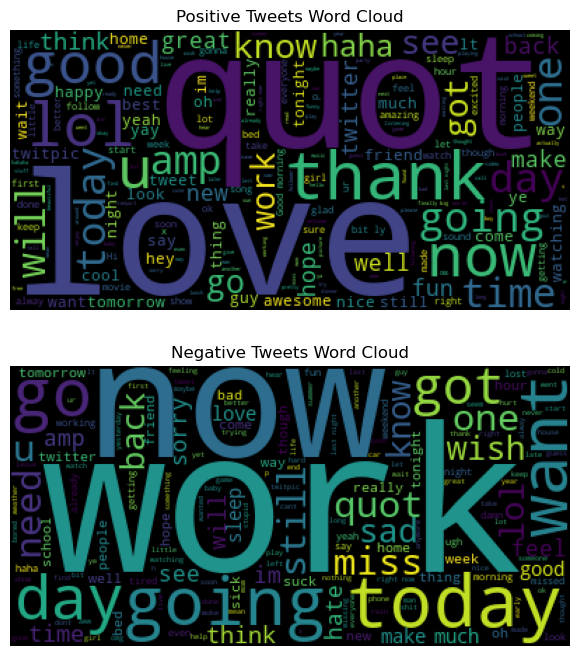

In [27]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.imshow(pos_wordcloud)
plt.title('Positive Tweets Word Cloud')
plt.axis("off")

plt.subplot(2, 1, 2)
plt.imshow(neg_wordcloud)
plt.title('Negative Tweets Word Cloud')
plt.axis("off")

plt.show()